There are `n` cities connected by some number of `flights`. You are given an array flights where **flights[i] = [from<sub>i</sub>, to<sub>i</sub>, price<sub>i</sub>]** indicates that there is a flight from city **from<sub>i</sub>** to city **to<sub>i</sub>** with cost **price<sub>i</sub>**.

You are also given three integers `src`, `dst`, and `k`, return ***the cheapest price*** *from `src` to `dst` with at most `k` stops*. If there is no such route, return `-1`.

<br>

**Example 1:**

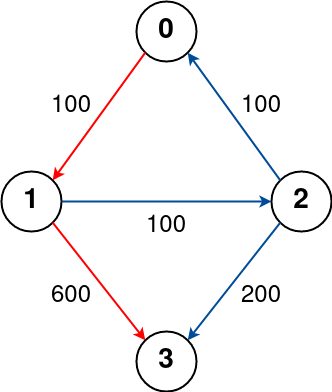

>**Input:** n = 4, flights = [[0,1,100],[1,2,100],[2,0,100],[1,3,600],[2,3,200]], src = 0, dst = 3, k = 1<br>
>**Output:** 700<br>
>**Explanation:**<br>
>The graph is shown above.<br>
>The optimal path with at most 1 stop from city 0 to 3 is marked in red and has cost 100 + 600 = 700.<br>
>Note that the path through cities [0,1,2,3] is cheaper but is invalid because it uses 2 stops.


**Example 2:**

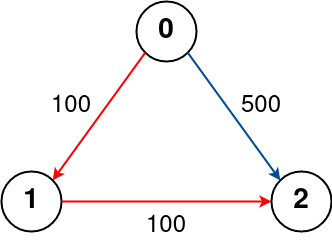

>**Input:** n = 3, flights = [[0,1,100],[1,2,100],[0,2,500]], src = 0, dst = 2, k = 1<br>
>**Output:** 200<br>
>**Explanation:**<br>
>The graph is shown above.<br>
>The optimal path with at most 1 stop from city 0 to 2 is marked in red and has cost 100 + 100 = 200.


**Example 3:**

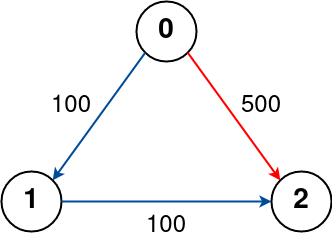

>**Input:** n = 3, flights = [[0,1,100],[1,2,100],[0,2,500]], src = 0, dst = 2, k = 0<br>
>**Output:** 500<br>
>**Explanation:**<br>
>The graph is shown above.<br>
>The optimal path with no stops from city 0 to 2 is marked in red and has cost 500.
 

**Constraints:**
- >1 <= n <= 100
- >0 <= flights.length <= (n * (n - 1) / 2)
- >flights[i].length == 3
- >0 <= from<sub>i</sub>, to<sub>i</sub> < n
- >from<sub>i</sub> != toi
- >1 <= price<sub>i</sub> <= 104
- >There will not be any multiple flights between two cities.
- >0 <= src, dst, k < n
- >src != dst

In [1]:
class Solution:
    def findCheapestPrice(self, n: int, flights: list[list[int]], src: int, dst: int, k: int) -> int:
        dp = [[float('inf')] * (k + 2) for _ in range(n)]
    
        for i in range(k + 2):
            dp[src][i] = 0
        
        for i in range(k + 1):
            for flight in flights:
                source, destination, price = flight
                if dp[source][i] != float('inf'):
                    dp[destination][i + 1] = min(dp[destination][i + 1], dp[source][i] + price)
        
        min_cost = min(dp[dst])
        
        return min_cost if min_cost != float('inf') else -1